In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.model_selection import GridSearchCV

In [71]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")

In [72]:
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


It has been observed that all the data are numeric, so best for making ML model without encoder. Data Frame is considering first row as columns names, so instead of that we are going to give columns names as below.

In [73]:
df.columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [74]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [75]:
df.isna().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [76]:
df.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

No NaN values are there, also all the data are either float or integer data type.

In [77]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The standard deviations of all the chemical combinations are less than 3 normal distribution of data found with no spreading of data. A little differences between Mean & Median found in Magnesium & Barium etc.

We are also considering that the full Barium data are outside of the Inter Quartile Range so its as huge Outliers almost 100% of Barium data.

A larger difference between 75% Percentile & Maximum value is showing in Potassium (K), Calcium (Ca) & Iron (Fe), so outliers are there.

Id         AxesSubplot(0.125,0.712609;0.227941x0.167391)
RI      AxesSubplot(0.398529,0.712609;0.227941x0.167391)
Na      AxesSubplot(0.672059,0.712609;0.227941x0.167391)
Mg         AxesSubplot(0.125,0.511739;0.227941x0.167391)
Al      AxesSubplot(0.398529,0.511739;0.227941x0.167391)
Si      AxesSubplot(0.672059,0.511739;0.227941x0.167391)
K           AxesSubplot(0.125,0.31087;0.227941x0.167391)
Ca       AxesSubplot(0.398529,0.31087;0.227941x0.167391)
Ba       AxesSubplot(0.672059,0.31087;0.227941x0.167391)
Fe             AxesSubplot(0.125,0.11;0.227941x0.167391)
Type        AxesSubplot(0.398529,0.11;0.227941x0.167391)
dtype: object

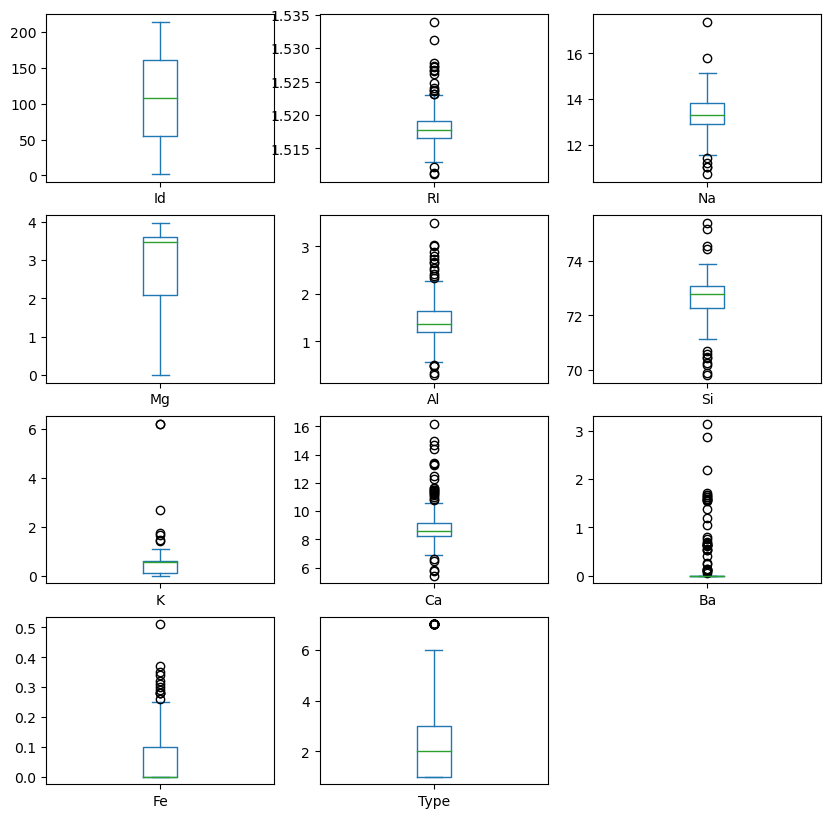

In [78]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(10,10))

As we have found that 100% of Barium data is outlier as per the above box plot also, instead of trying to remove the outliers from this columns, we are totally droping this Barium column, which would be much better for making our ML Model as per my consideration.

In [79]:
df.drop(['Ba'],axis=1,inplace=True)

Now we are going to get the corelation between the features by below Non Graphical and Graphical Analysis.

In [80]:
dfcor=df.corr()

In [81]:
dfcor

,Id,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
Id,1.000000,-0.065721,0.380767,-0.647082,0.488475,0.052634,-0.002306,0.090257,-0.078151,0.878113
RI,-0.065721,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.145791,-0.161322
Na,0.380767,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,-0.240802,0.504983
Mg,-0.647082,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,0.086906,-0.744004
Al,0.488475,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,-0.076456,0.597754
Si,0.052634,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.097674,0.147767
K,-0.002306,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.009586,-0.012765
Ca,0.090257,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,0.124674,0.000372
Fe,-0.078151,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,1.000000,-0.191090
Type,0.878113,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,-0.191090,1.000000


<AxesSubplot:>

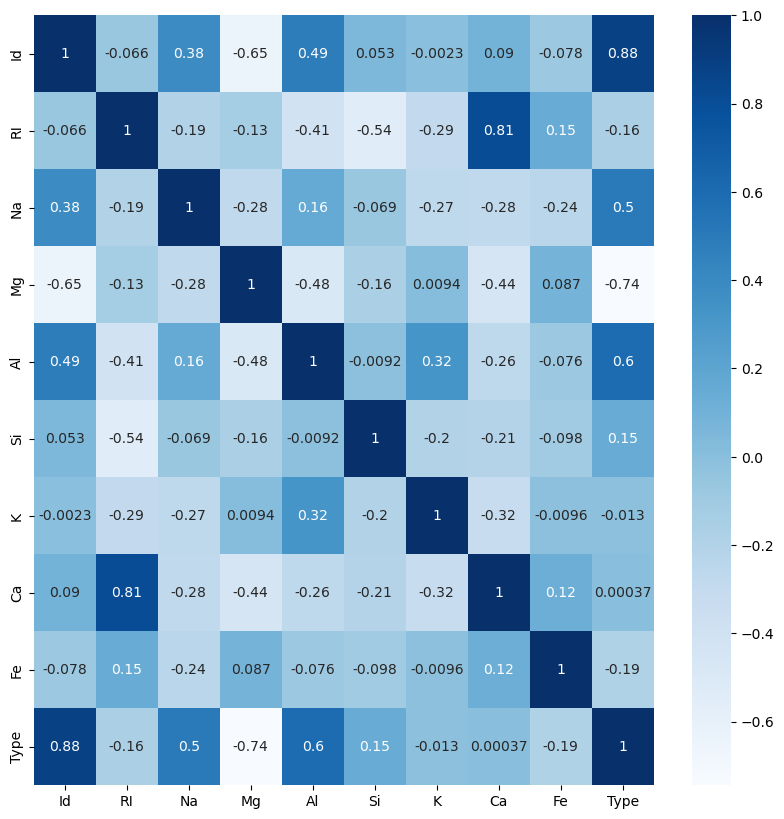

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,annot=True,cmap='Blues')

In [83]:
df.skew()

Id      0.000000
RI      1.639658
Na      0.457318
Mg     -1.154323
Al      0.900017
Si     -0.744546
K       6.549276
Ca      2.040591
Fe      1.747173
Type    1.108861
dtype: float64

So we have found that Mg is left sided skewed and RI, K, Ca & Fe is Right sided skewed data. We can observe the same via below graphs also.

<AxesSubplot:xlabel='Mg', ylabel='Density'>

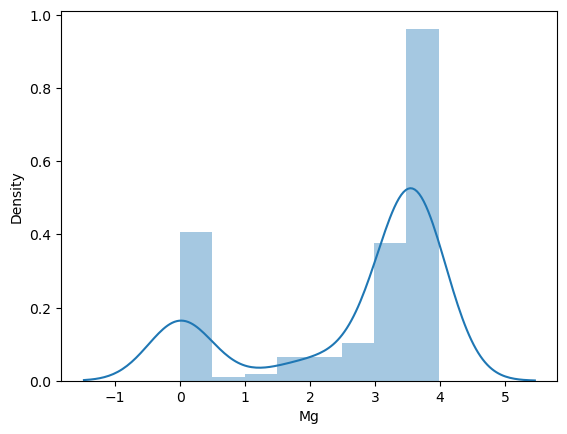

In [84]:
sns.distplot(df['Mg'])

<AxesSubplot:xlabel='K', ylabel='Density'>

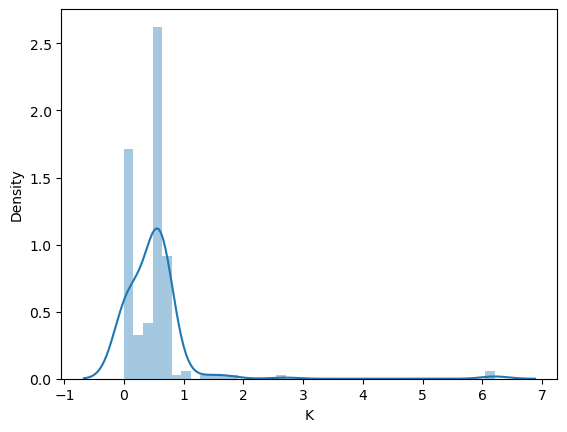

In [85]:
sns.distplot(df['K'])

Right sided skewness is present in Potassium (K)

<AxesSubplot:xlabel='Fe', ylabel='Density'>

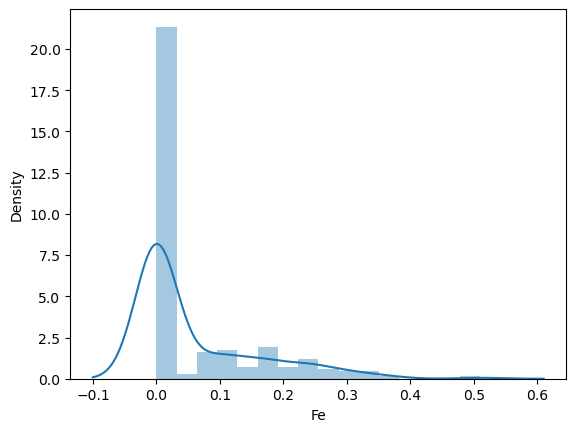

In [86]:
sns.distplot(df['Fe'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

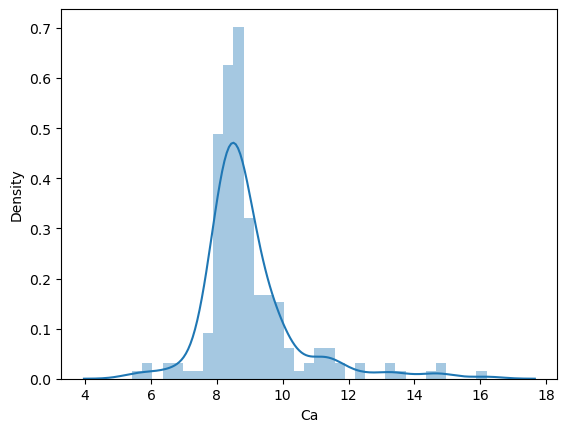

In [87]:
sns.distplot(df['Ca'])

A little skewness is present in Calcium (Ca)

Now we are trying to reduce the skewness & outliers by using the boxcox methods.

In [88]:
df['Fe']=boxcox(df['Fe'],.5)

<AxesSubplot:>

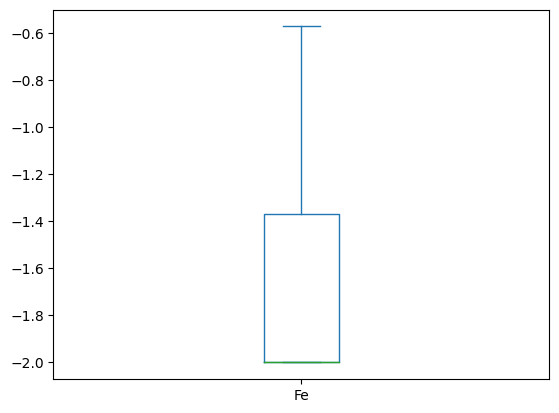

In [89]:
df['Fe'].plot.box()

In [90]:
df['Mg']=boxcox(df['Mg'],.5)

<AxesSubplot:>

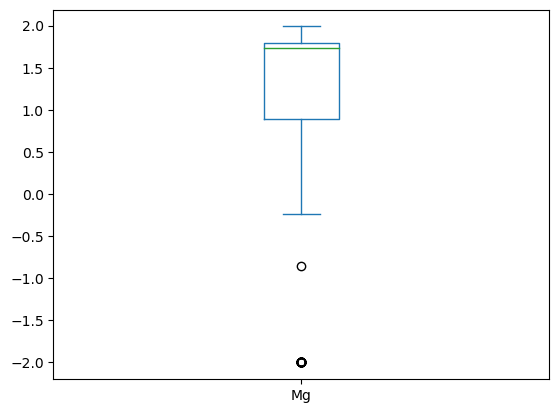

In [91]:
df['Mg'].plot.box()

In [92]:
df['RI']=boxcox(df['RI'],0)

<AxesSubplot:>

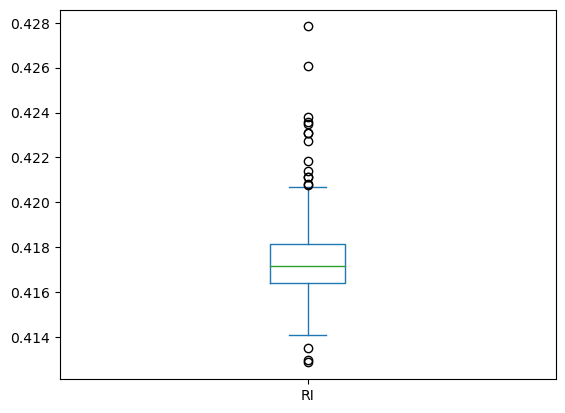

In [93]:
df['RI'].plot.box()

In [94]:
df['K']=boxcox(df['K'],.5)

<AxesSubplot:>

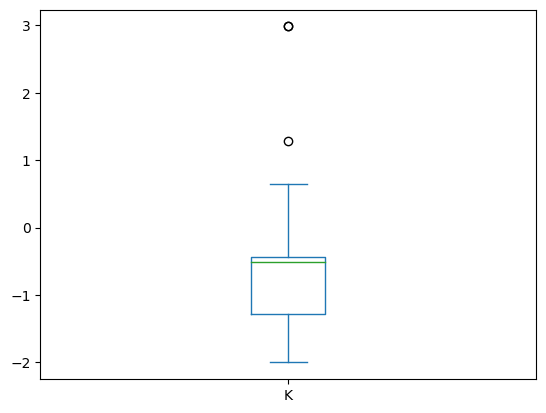

In [95]:
df['K'].plot.box()

In [96]:
df['Ca']=boxcox(df['Ca'],0)

<AxesSubplot:>

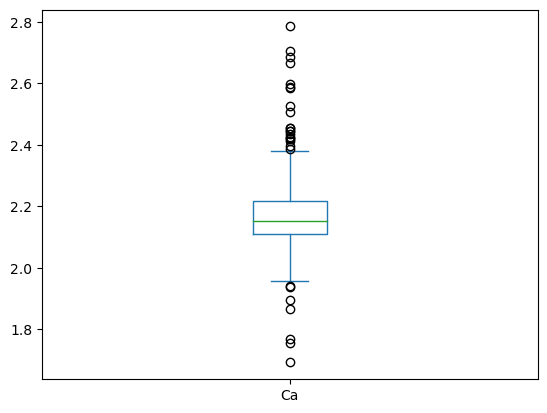

In [97]:
df['Ca'].plot.box()

Id         AxesSubplot(0.125,0.712609;0.227941x0.167391)
RI      AxesSubplot(0.398529,0.712609;0.227941x0.167391)
Na      AxesSubplot(0.672059,0.712609;0.227941x0.167391)
Mg         AxesSubplot(0.125,0.511739;0.227941x0.167391)
Al      AxesSubplot(0.398529,0.511739;0.227941x0.167391)
Si      AxesSubplot(0.672059,0.511739;0.227941x0.167391)
K           AxesSubplot(0.125,0.31087;0.227941x0.167391)
Ca       AxesSubplot(0.398529,0.31087;0.227941x0.167391)
Fe       AxesSubplot(0.672059,0.31087;0.227941x0.167391)
Type           AxesSubplot(0.125,0.11;0.227941x0.167391)
dtype: object

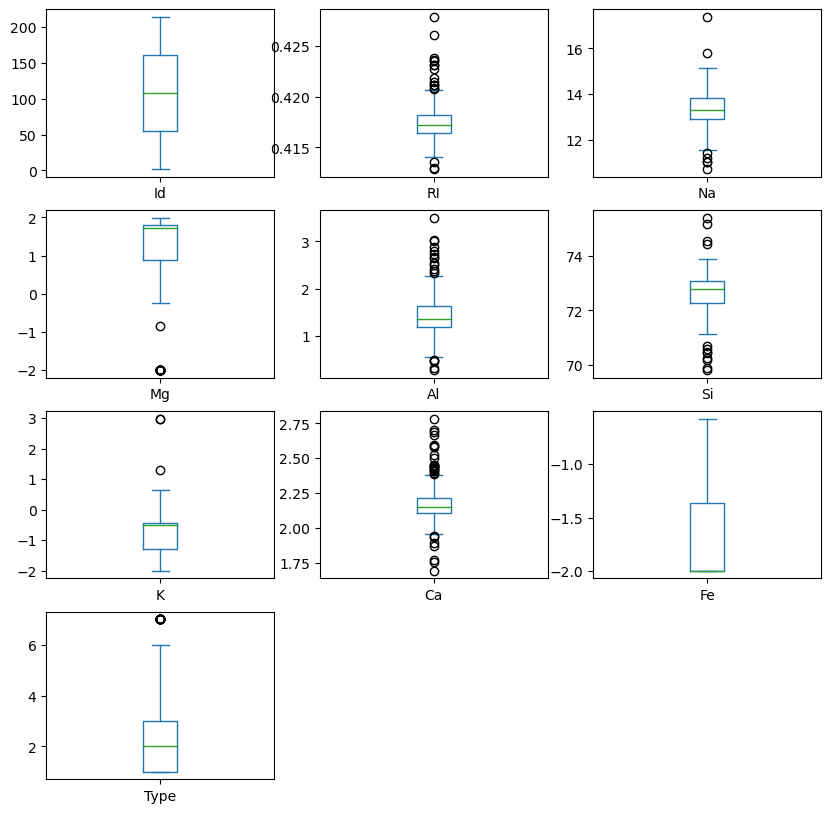

In [98]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(10,10))

After reducing the outliers by boxcox method, now we are going to eleminate some outliers via zscore method with below and above zscore value 3 both side of the mean with absolute positive value method.

In [99]:
z=np.abs(zscore(df))
z

,Id,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.723938,0.244559,0.591880,0.591973,0.173500,0.097091,0.238404,0.857859,0.663130,0.851703
1,1.707675,0.717500,0.150946,0.574216,0.187433,0.433777,0.049912,0.902321,0.663130,0.851703
2,1.691411,0.228031,0.240996,0.623627,0.313863,0.058303,0.409908,0.520492,0.663130,0.851703
3,1.675147,0.307372,0.167507,0.599041,0.414122,0.550322,0.373039,0.648315,0.663130,0.851703
4,1.658884,0.790300,0.755419,0.595510,0.347848,0.407878,0.534106,0.648315,1.893329,0.851703
...,...,...,...,...,...,...,...,...,...,...
208,1.658884,0.700956,0.898085,1.956080,2.874379,0.058303,0.892696,0.246144,0.663130,2.005192
209,1.675147,0.495857,1.853443,1.956080,1.089766,0.524423,1.673040,0.370149,0.663130,2.005192
210,1.691411,0.759376,1.167545,1.956080,1.149921,0.990604,1.673040,0.337177,0.663130,2.005192
211,1.707675,0.608320,1.192041,1.956080,0.989506,1.236644,1.673040,0.304361,0.663130,2.005192


In [100]:
cleaned_df=df[(z<3).all(axis=1)]
cleaned_df

,Id,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,2,0.417137,13.89,1.794733,1.36,72.73,-0.614359,2.057963,-2.000000,1
1,3,0.416194,13.53,1.768289,1.54,72.99,-0.751000,2.051556,-2.000000,1
2,4,0.417170,13.21,1.841875,1.29,72.61,-0.490033,2.106570,-2.000000,1
3,5,0.417012,13.27,1.805260,1.24,73.08,-0.516760,2.088153,-2.000000,1
4,6,0.416049,12.79,1.800000,1.62,72.97,-0.400000,2.088153,-0.980196,1
...,...,...,...,...,...,...,...,...,...,...
208,210,0.416227,14.14,-2.000000,2.88,72.61,-1.434315,2.217027,-2.000000,7
209,211,0.416636,14.92,-2.000000,1.99,73.06,-2.000000,2.128232,-2.000000,7
210,212,0.419138,14.36,-2.000000,2.02,73.42,-2.000000,2.132982,-2.000000,7
211,213,0.416412,14.38,-2.000000,1.94,73.61,-2.000000,2.137710,-2.000000,7


In [101]:
df.shape

(213, 10)

In [102]:
cleaned_df.shape

(201, 10)

After using Outliers reduction and removal methods, we have lost only 5.64% approximate data i.e. 12 rows from our previous data of 213 rows to our cleaned data of 201 rows

In [103]:
cleaned_df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,2,0.417137,13.89,1.794733,1.36,72.73,-0.614359,2.057963,-2.000000,1
1,3,0.416194,13.53,1.768289,1.54,72.99,-0.751000,2.051556,-2.000000,1
2,4,0.417170,13.21,1.841875,1.29,72.61,-0.490033,2.106570,-2.000000,1
3,5,0.417012,13.27,1.805260,1.24,73.08,-0.516760,2.088153,-2.000000,1
4,6,0.416049,12.79,1.800000,1.62,72.97,-0.400000,2.088153,-0.980196,1


Now spliting Independent Variable in x and Dependent Variable y (Target/Label)

In [104]:
x=cleaned_df.iloc[:,0:-1]

In [105]:
y=cleaned_df.iloc[:,-1]

In [106]:
x.shape

(201, 9)

In [107]:
y.shape

(201,)

Out of 201 rows dataset, we are sending 75% data for training and rest 25% data for testing usage. And using for loop for different random_state ranging from 0 to 50

In [108]:
lr=LogisticRegression()

In [109]:
for i in range(0,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    ascore=accuracy_score(ytest,pred)
    print(ascore)

1.0
0.9803921568627451
1.0
1.0
0.9803921568627451
1.0
1.0
0.9803921568627451
1.0
1.0
0.9803921568627451
1.0
0.9607843137254902
1.0
0.9803921568627451
0.9803921568627451
0.9607843137254902
0.9803921568627451
1.0
1.0
0.9803921568627451
0.9803921568627451
1.0
0.9803921568627451
0.9411764705882353
1.0
0.9803921568627451
1.0
0.9803921568627451
1.0
1.0
1.0
1.0
1.0
0.9803921568627451
0.9803921568627451
1.0
0.9803921568627451
1.0
0.9803921568627451
1.0
0.9607843137254902
0.9607843137254902
1.0
0.9607843137254902
0.9607843137254902
0.9803921568627451
1.0
0.9803921568627451
0.9607843137254902


By the above loop function, we got that in many radom_state the model is giving 100% accurate predictions. So we are using the random_state 2 for our further process.

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

In [111]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [112]:
pred=lr.predict(xtest)

In [113]:
accuracy_score(ytest,pred)

1.0

In [114]:
balanced_accuracy_score(ytest,pred)

1.0

In [115]:
confusion_matrix(ytest,pred)

array([[23,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

In [116]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        23\n           2       1.00      1.00      1.00        15\n           3       1.00      1.00      1.00         1\n           5       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         8\n\n    accuracy                           1.00        51\n   macro avg       1.00      1.00      1.00        51\nweighted avg       1.00      1.00      1.00        51\n'

By the above, we have found the 100% accurate prediction and the Confusion Matrix is also having all the values in True Positive diagonal way without any confusion.

As we have got the best ML result with Logistic Regression, there is no need to try any other Classifier Algorithm.

So now we are going to test our above best LR Model with various Cross Validation methods as below

In [117]:
cv1=cross_val_score(lr,x,y,cv=KFold(n_splits=50))

In [118]:
cv1

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.5 , 0.75, 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 0.75, 0.75, 1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 0.75,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [119]:
print("Length of CV1 is:",len(cv1),"Splits And its Average is:", cv1.mean())

Length of CV1 is: 50 Splits And its Average is: 0.965


In [120]:
cv2=cross_val_score(lr,x,y,cv=StratifiedKFold(n_splits=10))

In [121]:
cv2

array([0.80952381, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.7       ])

In [122]:
print("Length of CV2 is:",len(cv2),"Splits And its Average is:", cv2.mean())

Length of CV2 is: 10 Splits And its Average is: 0.950952380952381


In [123]:
cv3=cross_val_score(lr,x,y,cv=LeaveOneOut())

In [124]:
cv3

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [125]:
print("Length of CV3 is:",len(cv3),"Splits And its Average is:", cv3.mean())

Length of CV3 is: 201 Splits And its Average is: 0.9850746268656716


In [126]:
cv4=cross_val_score(lr,x,y,cv=ShuffleSplit(train_size=0.5,test_size=0.5,n_splits=5))

In [127]:
cv4

array([0.95049505, 0.99009901, 0.95049505, 1.        , 0.99009901])

In [128]:
print("Length of CV4 is:",len(cv4),"Splits And its Average is:", cv4.mean())

Length of CV4 is: 5 Splits And its Average is: 0.9762376237623762


As all the Cross Validation Average Scores are between 95% to 100%, we are saving this best Machine Learning Model by the Pickle method.

In [129]:
pickle.dump(lr, open('my_glass_model', 'wb'))

In [130]:
lr_model=pickle.load(open('my_glass_model', 'rb'))

In [131]:
model_pred_y=lr_model.predict(xtest)

In [132]:
model_pred_y

array([1, 7, 1, 2, 1, 2, 1, 1, 7, 1, 7, 1, 1, 2, 1, 1, 1, 5, 2, 7, 1, 1,
       1, 1, 1, 7, 6, 1, 1, 2, 2, 2, 1, 2, 2, 7, 1, 2, 1, 7, 2, 2, 6, 1,
       2, 3, 5, 7, 2, 2, 1], dtype=int64)

In [133]:
accuracy_score(ytest,model_pred_y)

1.0

After saving our best ML Model, now are checking the same with Hyper Parameter Tunning via Grid Search Cross Validation method below

In [134]:
gs=GridSearchCV(estimator=lr,param_grid={'penalty':['l1','l2'],'C':[0.001,0.01,0.1]},scoring='accuracy',cv=10,refit=True,return_train_score=True)

In [135]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [136]:
HyPred=gs.best_estimator_.predict(xtest)

In [137]:
HyPred

array([1, 7, 1, 2, 1, 2, 1, 1, 7, 1, 7, 1, 1, 2, 1, 1, 1, 5, 2, 7, 1, 1,
       1, 1, 1, 7, 6, 1, 1, 2, 2, 2, 1, 2, 2, 7, 1, 2, 1, 7, 2, 2, 6, 1,
       2, 3, 5, 7, 2, 2, 1], dtype=int64)

In [138]:
accuracy_score(HyPred,ytest)

1.0

With Hyper Parameter Tunning also, we got the best 100% accurate predicted results by our saved Machine Learning Model.